In [2]:
#Read Data

In [1]:
# Library
import numpy as np
import cv2
import matplotlib.pyplot as plt
cv2.__version__
pip install 

ModuleNotFoundError: No module named 'numpy'

In [3]:
#General Settings
folder = 'video-data/kitti/2011_09_26_drive_0001_extract/image_02/data/'
image = '0000000100.png'

In [4]:
def getImage(): 
    img = cv2.imread(folder + image) # reads image 'opencv-logo.png' as grayscale
    return img

In [5]:
def getGrayImage(): 
    # Convert to Grayscale
    return cv2.cvtColor(getImage(), cv2.COLOR_BGR2GRAY) 

In [6]:
# Reshape Image
def reshapeImage():
    resized_image = cv2.resize(getGrayImage(), (750, 250)) 

In [7]:
def gaussianBlur():
    return cv2.GaussianBlur(getGrayImage(),(5,5),0)

In [138]:
def regionOfInterest(image):
    height = image.shape[0]
    triangle = np.array([[(0, height), (1000, height), (700, 200)]])
    mask = np.zeros_like(image)
    cv2.fillPoly(mask, triangle, 255)
    return cv2.bitwise_and(image, mask)
    #return mask

In [144]:
def regionOfInterestOverlay(image):
    height = image.shape[0]
    triangle = np.array([[(0, height), (1000, height), (700, 200)]])
    mask = np.zeros_like(image)
    cv2.fillPoly(mask, triangle, 255)
    return mask

In [117]:
def displayLines(image, lines):
    line_image = np.zeros_like(image)
    if lines is not None:
        for line in lines:
            x1, y1, x2, y2 = line.reshape(4)
            cv2.line(line_image, (x1, y1), (x2, y2), (255, 0, 0), 10)
    return line_image   

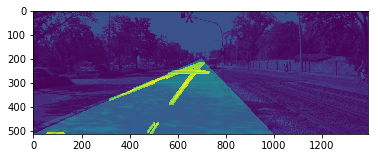

In [200]:
mask_white = cv2.Canny(gaussianBlur(getImage()), 200, 300)
croppedImage = regionOfInterest(mask_white)
overlay = regionOfInterestOverlay(mask_white)
dst = cv2.addWeighted(getGrayImage(), .5, overlay, .5, 0.0)
    
lines = cv2.HoughLinesP(croppedImage, 1, np.pi/180, 50, maxLineGap=50)
res = displayLines(getGrayImage(), lines)

dst2 = cv2.addWeighted(dst, .5, res, .5, 0.0)
plt.imshow(dst2,)

In [181]:
print(dst.ndu, res.ndim)
dst2 = cv2.addWeighted(dst, .5, res, .5, 0.0)
    
dst.shape


2 2


(512, 1392)